In [3]:
import hiplot as hip
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import load_model
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from attack import fgsm, pgd
import itertools
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image

In [17]:
(_, _), (x_test, y_test) = cifar10.load_data()
x_test = x_test/255.0

In [5]:
model = load_model("model_20200419-160722")
loss = SparseCategoricalCrossentropy(from_logits=True)
test_loss, test_acc = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 3s 296us/sample - loss: 1.6140 - accuracy: 0.7071


In [6]:
epsilons = [0.5, 0.1, 0.05, 0.01, 0.005, 0.001]

In [7]:
hp = []
for eps in epsilons:
    print(eps)
    x_adv = fgsm(x_test, y_test, model, loss, eps)
    adv_loss, adv_acc = model.evaluate(x_adv, y_test)
    hp.append({"epsilon": str(eps), "loss": str(adv_loss), "accuracy": str(adv_acc)})

0.5
10000/10000 [==============================] - 0s 45us/sample - loss: 23.6311 - accuracy: 0.1003
0.1
10000/10000 [==============================] - 0s 43us/sample - loss: 21.8586 - accuracy: 0.0499
0.05
10000/10000 [==============================] - 0s 49us/sample - loss: 20.3902 - accuracy: 0.0632
0.01
10000/10000 [==============================] - 0s 48us/sample - loss: 7.7364 - accuracy: 0.2527
0.005
10000/10000 [==============================] - 0s 49us/sample - loss: 4.4974 - accuracy: 0.4190
0.001
10000/10000 [==============================] - 0s 48us/sample - loss: 2.0974 - accuracy: 0.6418


In [8]:
hip.Experiment.from_iterable(hp).display()

<IPython.core.display.Javascript object>

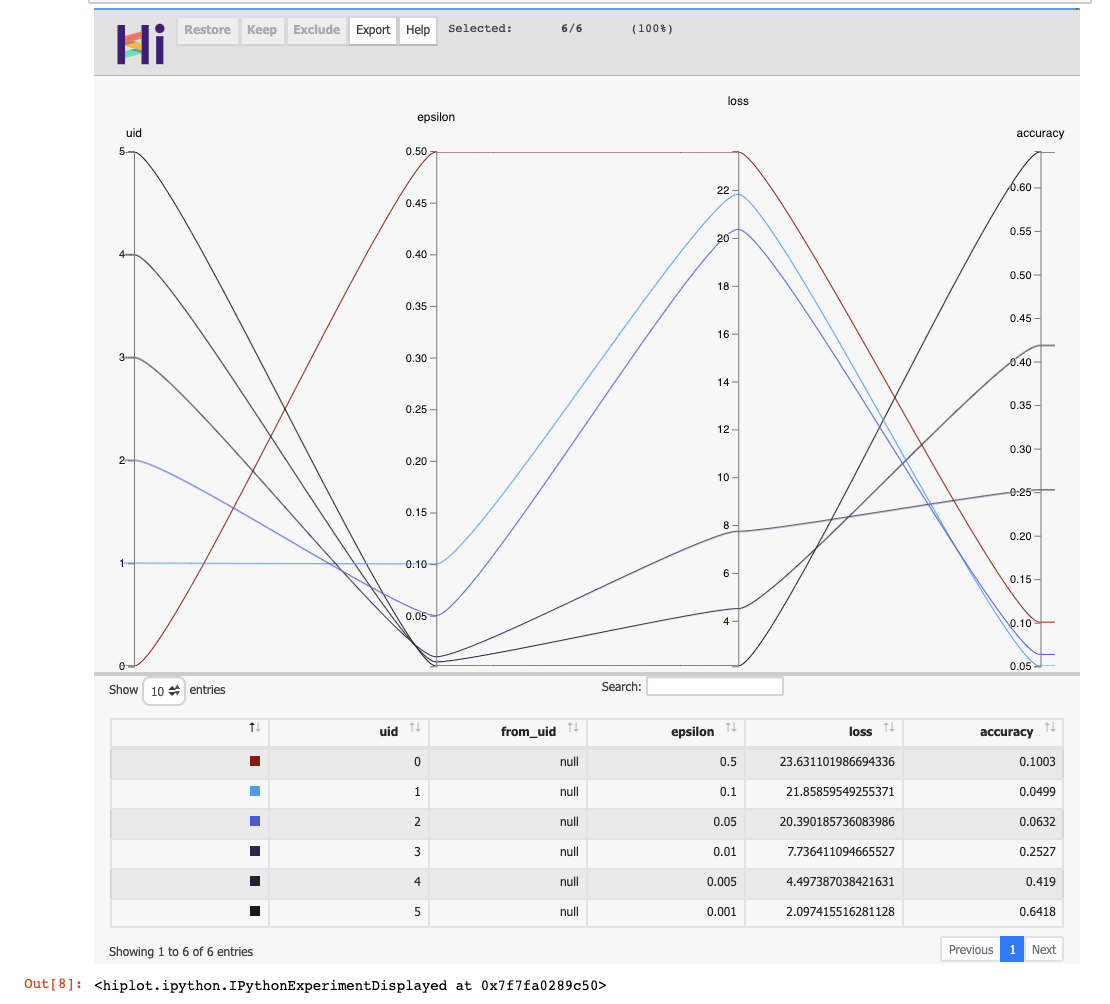

In [17]:
Image(filename='im1.png', width=1000, height=1000)

In [ ]:
np.expand_dims(x[i], 0)

In [ ]:
plt.imshow(x_test[0].reshape((32, 32, 3)))
plt.show()

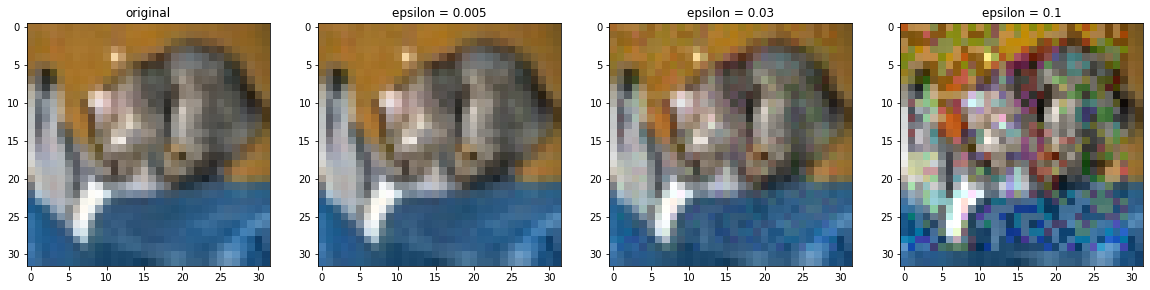

In [48]:
fig, axs = plt.subplots(1, 4, figsize=(20, 20))
for ax, interp, eps in zip(axs, ['original', 'epsilon = 0.005', 'epsilon = 0.03', 'epsilon = 0.1'], [0, 0.005, 0.03, 0.1]):
    ax.imshow(fgsm(np.expand_dims(x_test[0], 0), y_test[0], model, loss, eps).reshape(32, 32, 3))
    ax.set_title(interp)

plt.show()

In [9]:
model_small = load_model("model_20200419-140515")
model_large = load_model("model_20200419-160722")
model_small_stop = load_model("model_20200419-132133")
model_large_stop = load_model("model_20200419-155619")
model_large_dropout = load_model("model_20200419-172408")

In [10]:
model_large_dropout.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 57us/sample - loss: 0.7205 - accuracy: 0.7536


[0.7204834443092346, 0.7536]

In [11]:
model_small_stop.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 55us/sample - loss: 0.8632 - accuracy: 0.7156


[0.8631660423278809, 0.7156]

In [12]:
model_small.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 49us/sample - loss: 0.9770 - accuracy: 0.7133


[0.9769995007514953, 0.7133]

In [13]:
model_large_stop.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 56us/sample - loss: 0.8611 - accuracy: 0.7121


[0.8611340675354003, 0.7121]

In [14]:
model_large.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 54us/sample - loss: 1.6140 - accuracy: 0.7071


[1.6140298775672912, 0.7071]

In [15]:
eps = 0.03
x_adv_small = fgsm(x_test, y_test, model_small, loss, eps)
x_adv_small_stop = fgsm(x_test, y_test, model_small_stop, loss, eps)
x_adv_large = fgsm(x_test, y_test, model_large, loss, eps)
x_adv_large_stop = fgsm(x_test, y_test, model_large_stop, loss, eps)
x_adv_large_dropout = fgsm(x_test, y_test, model_large_dropout, loss, eps)

In [70]:
model_large_dropout.evaluate(x_adv_large_dropout, y_test)

10000/10000 [==============================] - 2s 217us/sample - loss: 6.2085 - accuracy: 0.0633


[6.2084951477050785, 0.0633]

In [63]:
model_large.evaluate(x_adv_large, y_test)

10000/10000 [==============================] - 4s 395us/sample - loss: 16.6171 - accuracy: 0.0926


[16.61712585144043, 0.0926]

In [62]:
model_large_stop.evaluate(x_adv_large_stop, y_test)

10000/10000 [==============================] - 4s 415us/sample - loss: 5.3929 - accuracy: 0.0561


[5.392941564941406, 0.0561]

In [64]:
model_small_stop.evaluate(x_adv_small_stop, y_test)

10000/10000 [==============================] - 2s 239us/sample - loss: 7.0627 - accuracy: 0.0363


[7.062680601501465, 0.0363]

In [65]:
model_small.evaluate(x_adv_small, y_test)

10000/10000 [==============================] - 2s 235us/sample - loss: 9.7268 - accuracy: 0.0276


[9.726773637390137, 0.0276]

In [51]:
iterations = [5, 10, 15]
eps = [0.01, 0.03, 0.05]
eta = [0.001, 0.01, 0.1]

In [52]:
hp_pgd = []
for it, ep, et in itertools.product(iterations, eps, eta):
    print(it, ep, et)
    x_pgd = pgd(x_test, y_test, model_large, loss, nb_step=it, epsilon=ep, eta=et)
    adv_loss, adv_acc = model.evaluate(x_pgd, y_test)
    hp_pgd.append({"iteration": str(it), "epsilon": str(ep), "eta": str(et), "loss": str(adv_loss), 
               "accuracy": str(adv_acc)})

5 0.01 0.001
10000/10000 [==============================] - 0s 49us/sample - loss: 2.0974 - accuracy: 0.6418
5 0.01 0.01
10000/10000 [==============================] - 0s 49us/sample - loss: 7.7364 - accuracy: 0.2527
5 0.01 0.1
10000/10000 [==============================] - 0s 49us/sample - loss: 7.7364 - accuracy: 0.2527
5 0.03 0.001
10000/10000 [==============================] - 0s 48us/sample - loss: 2.0974 - accuracy: 0.6418
5 0.03 0.01
10000/10000 [==============================] - 0s 48us/sample - loss: 7.7364 - accuracy: 0.2527
5 0.03 0.1
10000/10000 [==============================] - 0s 48us/sample - loss: 16.6178 - accuracy: 0.0924
5 0.05 0.001
10000/10000 [==============================] - 0s 49us/sample - loss: 2.0974 - accuracy: 0.6418
5 0.05 0.01
10000/10000 [==============================] - 0s 48us/sample - loss: 7.7364 - accuracy: 0.2527
5 0.05 0.1
10000/10000 [==============================] - 0s 48us/sample - loss: 20.3902 - accuracy: 0.0632
10 0.01 0.001
10000/10000 

In [53]:
hip.Experiment.from_iterable(hp_pgd).display()

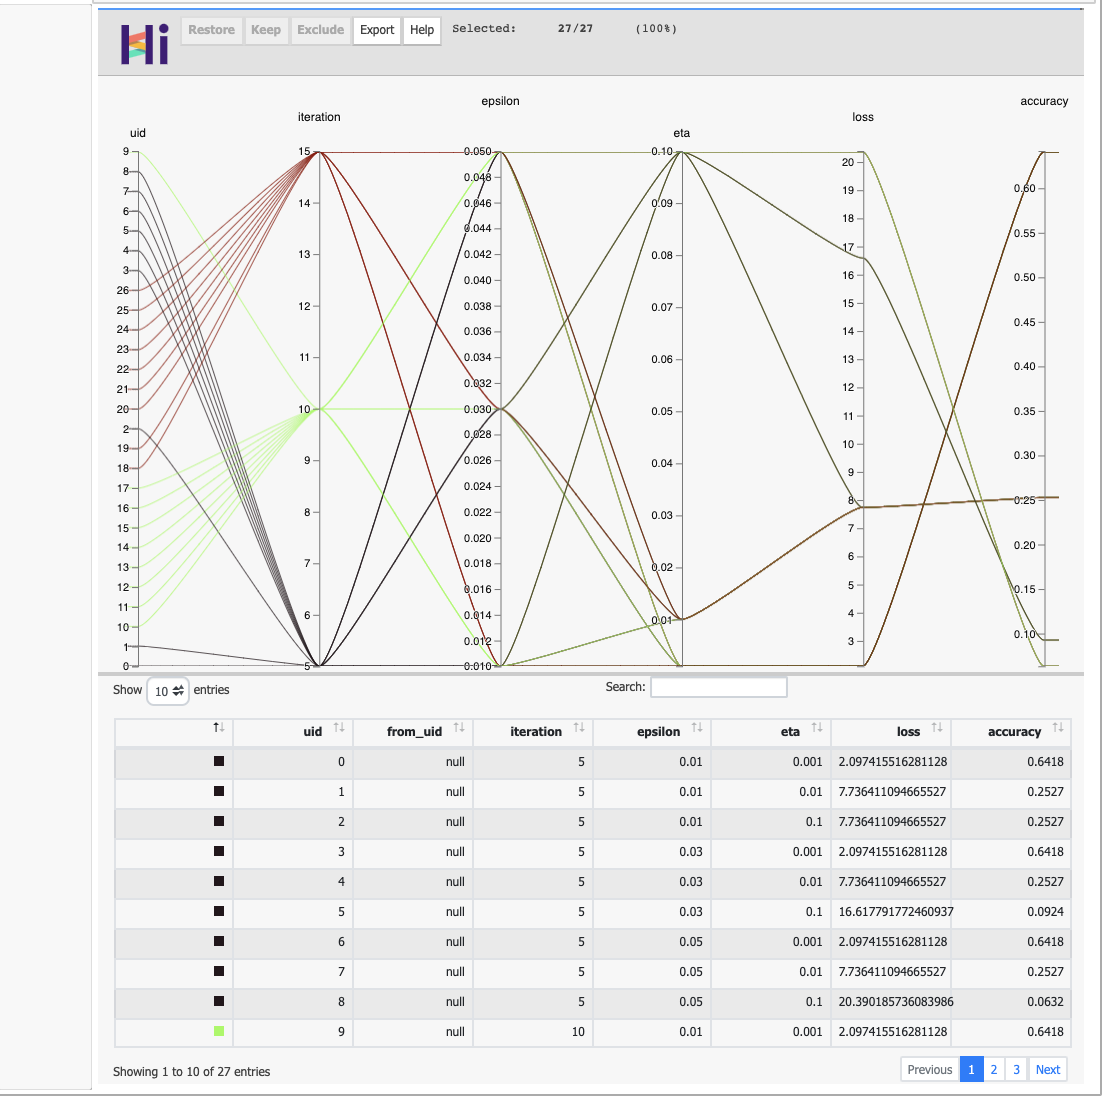

In [18]:
Image(filename='im2.png', width=1000, height=1000)